In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
anova = f_classif(X, y)
anova

(array([3.64409051e+02, 5.67272362e+01, 1.13607413e+01, 5.28642415e+03,
        4.37871086e+01, 6.41283478e+01, 1.70885578e+02, 8.90980346e+01,
        5.98328252e+02, 1.97547320e+02, 5.74786775e+01, 1.46401642e+00,
        3.00081302e+01, 3.60840390e+01, 2.65788334e+01, 1.69540172e+01,
        2.19746288e+01, 3.69222219e+01, 1.00005242e+00, 2.04655442e+02,
        2.83552300e+01, 1.46937043e+03, 3.69281913e+01, 2.81416058e+03,
        3.38946336e+02, 9.71136687e+01, 3.37305549e+02, 8.90980346e+01,
        3.64409051e+02, 5.67272362e+01, 1.13607413e+01, 1.43736240e+02,
        2.88874274e+01, 1.10726167e+01, 9.08668038e+00, 5.90058824e+00,
        1.68043799e+01, 3.49265176e+01]),
 array([0.00000000e+000, 1.72727377e-119, 3.39303588e-021, 0.00000000e+000,
        5.70021430e-092, 5.64284992e-135, 0.00000000e+000, 7.55985779e-186,
        0.00000000e+000, 0.00000000e+000, 4.53488357e-121, 1.37700719e-001,
        4.30103277e-062, 2.46777207e-075, 1.39814382e-054, 2.01104307e-033,
      

Text(0, 0.5, 'F Statistic')

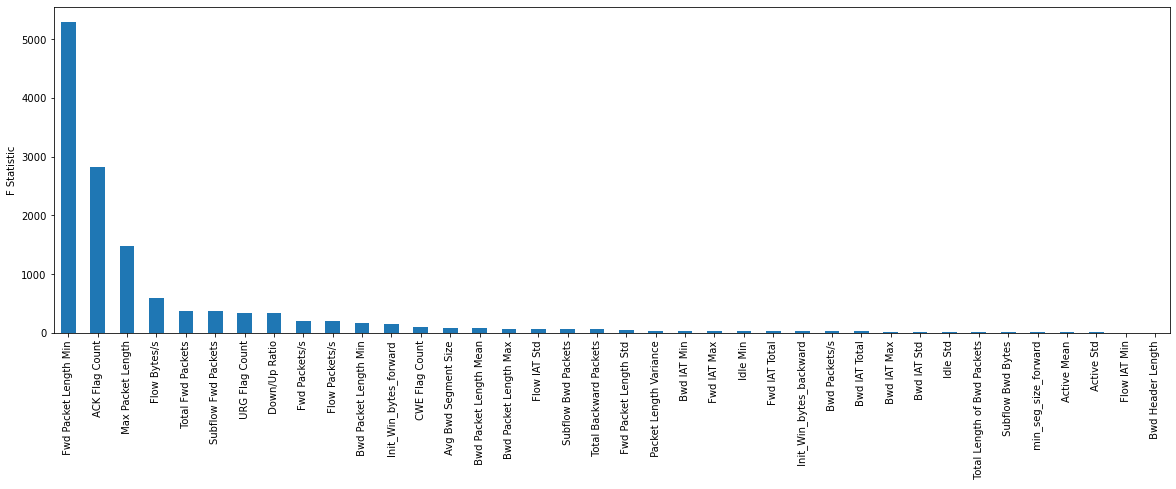

In [6]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

anova_f = pd.Series(anova[0])
anova_f.index = X.columns
anova_f.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('F Statistic')

Text(0, 0.5, 'P values')

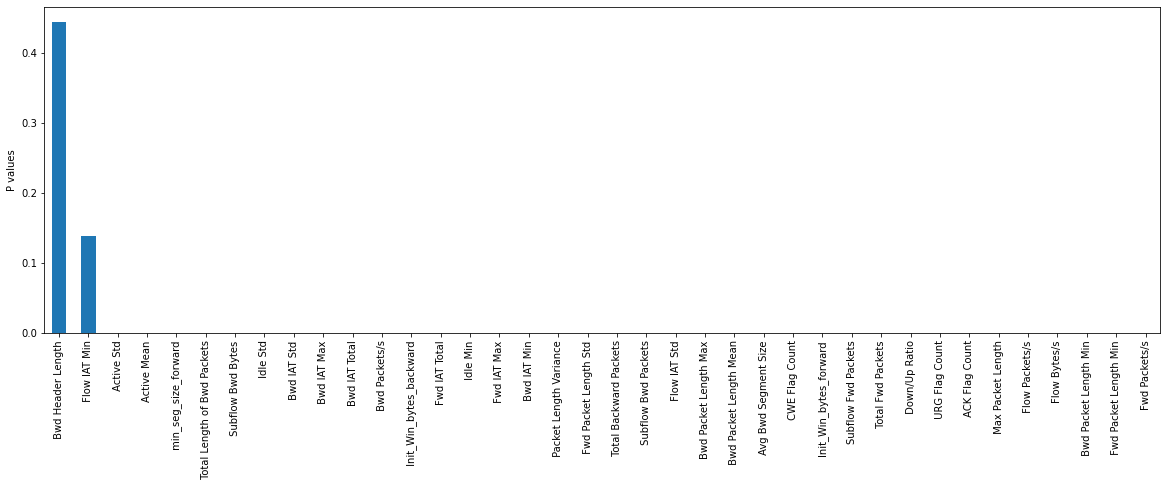

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

anova_p = pd.Series(anova[1])
anova_p.index = X.columns
anova_p.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('P values')

In [8]:
# here we will select the top 20 features

# select features
selector = SelectKBest(f_classif, k=20).fit(X, y)

# display features
X.columns[selector.get_support()]

Index([' Total Fwd Packets', ' Total Backward Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Std', 'Fwd Packets/s', ' Max Packet Length',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' Down/Up Ratio', ' Avg Bwd Segment Size', 'Subflow Fwd Packets',
       ' Subflow Bwd Packets', 'Init_Win_bytes_forward'],
      dtype='object')

In [9]:
# to remove the rest of the features:

X = selector.transform(X)

In [10]:
X.shape

(5280, 20)